# Ridge regression
**Important**: Change the kernel to *PROJECT_NAME local*. You can do this from the *Kernel* menu under *Change kernel*.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import pickle
import os
import scipy.stats as st

In [2]:
from azureml.logging import get_azureml_logger
run_logger = get_azureml_logger()
run_logger.log('amlrealworld.timeseries.ridge','true')

In [3]:
model_name = "ridge"
aml_dir = os.environ['AZUREML_NATIVE_SHARE_DIRECTORY']
train = pd.read_csv(os.path.join(aml_dir, 'nyc_demand_train.csv'), parse_dates=['timeStamp'])

Create model pipeline:
- **one-hot encode categorical variables**
- **randomized parameter search** with cross validation to find optimal values for the alpha parameter

Fitting this pipeline should take less than a minute.

In [4]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [5]:
cat_cols = ['hour', 'month', 'dayofweek']
cat_cols_idx = [X.columns.get_loc(c) for c in X.columns if c in cat_cols]
onehot = OneHotEncoder(categorical_features=cat_cols_idx, sparse=False)
regr = Ridge(fit_intercept=False)
tscv = TimeSeriesSplit(n_splits=3)

In [6]:
param_dist = {'alpha': st.uniform(1e-4, 10.0)}
regr_cv = RandomizedSearchCV(estimator=regr,
                            param_distributions=param_dist,
                            n_iter=100,
                            scoring='neg_mean_squared_error',
                            iid=False,
                            cv=tscv,
                            verbose=2,
                            n_jobs=-1)
regr_pipe = Pipeline([('onehot', onehot), ('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] alpha=0.134144716598 ............................................
[CV] alpha=0.134144716598 ............................................
[CV] ............................. alpha=0.134144716598, total=   0.1s
[CV] alpha=0.134144716598 ............................................
[CV] ............................. alpha=0.134144716598, total=   0.1s
[CV] alpha=7.39447876031 .............................................
[CV] ............................. alpha=0.134144716598, total=   0.1s
[CV] .............................. alpha=7.39447876031, total=   0.1s
[CV] alpha=7.39447876031 .............................................
[CV] alpha=6.78727585438 .............................................
[CV] .............................. alpha=7.39447876031, total=   0.1s
[CV] alpha=7.39447876031 .............................................
[CV] .............................. alpha=6.78727585438, total=   0.1s
[CV] alpha=6.7

[CV] alpha=8.56339539108 .............................................
[CV] .............................. alpha=8.56339539108, total=   0.1s
[CV] .............................. alpha=8.56339539108, total=   0.1s
[CV] alpha=8.56339539108 .............................................
[CV] alpha=5.06668183535 .............................................
[CV] .............................. alpha=5.06668183535, total=   0.1s
[CV] alpha=5.06668183535 .............................................
[CV] .............................. alpha=8.56339539108, total=   0.2s
[CV] alpha=5.06668183535 .............................................
[CV] .............................. alpha=5.06668183535, total=   0.1s
[CV] alpha=9.15047645093 .............................................
[CV] .............................. alpha=5.06668183535, total=   0.2s
[CV] alpha=9.15047645093 .............................................
[CV] .............................. alpha=9.15047645093, total=   0.1s
[CV] a

[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.1s


[CV] .............................. alpha=1.33388535216, total=   0.1s
[CV] .............................. alpha=1.33388535216, total=   0.1s
[CV] alpha=9.11024940559 .............................................
[CV] alpha=9.11024940559 .............................................
[CV] .............................. alpha=9.11024940559, total=   0.1s
[CV] alpha=1.9092123878 ..............................................
[CV] .............................. alpha=9.11024940559, total=   0.1s
[CV] alpha=9.11024940559 .............................................
[CV] ............................... alpha=1.9092123878, total=   0.1s
[CV] alpha=1.9092123878 ..............................................
[CV] .............................. alpha=9.11024940559, total=   0.2s
[CV] alpha=1.9092123878 ..............................................
[CV] ............................... alpha=1.9092123878, total=   0.1s
[CV] ............................... alpha=1.9092123878, total=   0.1s
[CV] a

[CV] .............................. alpha=2.42131751454, total=   0.1s
[CV] alpha=2.42131751454 .............................................
[CV] .............................. alpha=2.42131751454, total=   0.1s
[CV] alpha=2.42131751454 .............................................
[CV] .............................. alpha=8.90927548333, total=   0.2s
[CV] .............................. alpha=2.42131751454, total=   0.1s
[CV] alpha=7.3408534436 ..............................................
[CV] alpha=7.3408534436 ..............................................
[CV] ............................... alpha=7.3408534436, total=   0.1s
[CV] alpha=9.65157103575 .............................................
[CV] ............................... alpha=7.3408534436, total=   0.2s
[CV] alpha=7.3408534436 ..............................................
[CV] .............................. alpha=9.65157103575, total=   0.1s
[CV] alpha=9.65157103575 .............................................
[CV] .

[CV] .............................. alpha=7.95680717617, total=   0.1s
[CV] .............................. alpha=7.95680717617, total=   0.1s
[CV] alpha=7.55908993141 .............................................
[CV] alpha=7.95680717617 .............................................
[CV] .............................. alpha=7.55908993141, total=   0.1s
[CV] alpha=7.55908993141 .............................................
[CV] .............................. alpha=7.95680717617, total=   0.1s
[CV] .............................. alpha=7.55908993141, total=   0.1s
[CV] alpha=7.55908993141 .............................................
[CV] alpha=5.24720788562 .............................................
[CV] .............................. alpha=7.55908993141, total=   0.2s
[CV] .............................. alpha=5.24720788562, total=   0.1s
[CV] alpha=5.24720788562 .............................................
[CV] alpha=5.24720788562 .............................................
[CV] .

[CV] .............................. alpha=3.81361011769, total=   0.1s
[CV] alpha=9.79761615375 .............................................
[CV] .............................. alpha=9.79761615375, total=   0.1s
[CV] alpha=9.79761615375 .............................................
[CV] .............................. alpha=3.81361011769, total=   0.2s
[CV] alpha=9.79761615375 .............................................
[CV] .............................. alpha=9.79761615375, total=   0.1s
[CV] .............................. alpha=9.79761615375, total=   0.1s
[CV] alpha=6.95312673912 .............................................
[CV] .............................. alpha=6.95312673912, total=   0.1s
[CV] alpha=6.95312673912 .............................................
[CV] alpha=6.95312673912 .............................................
[CV] .............................. alpha=6.95312673912, total=   0.1s
[CV] alpha=4.35995985984 .............................................
[CV] .

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.9s finished


Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=[2, 3, 4], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise',
          estimator=Ridge(...=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2))])

In [7]:
with open(os.path.join(aml_dir, model_name + '.pkl'), 'wb') as f:
    pickle.dump(regr_pipe, f)

Cross validation results

In [8]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score').head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
51,0.095755,0.003645,-3878.856215,-4220.672655,6.28629,{'alpha': 6.28628876113},1,-4167.598849,-4383.458089,-3679.050219,-4237.633033,-3789.919576,-4040.926844,0.008894,0.001034,209.128725,140.351118
29,0.133353,0.005171,-3878.857262,-4220.853619,6.41759,{'alpha': 6.417590262},2,-4167.805012,-4383.833686,-3678.971552,-4237.745656,-3789.795220,-4040.981514,0.055903,0.003295,209.266295,140.477539
13,0.086545,0.002455,-3878.857415,-4220.864319,6.42531,{'alpha': 6.42530614421},3,-4167.817296,-4383.855880,-3678.966991,-4237.752323,-3789.787957,-4040.984753,0.033398,0.001539,209.274431,140.485007
81,0.063124,0.004370,-3878.857706,-4220.518550,6.17323,{'alpha': 6.17323151823},4,-4167.425752,-4383.137876,-3679.119558,-4237.537326,-3790.027810,-4040.880447,0.020174,0.001505,209.011639,140.243279
27,0.116651,0.002360,-3878.858162,-4220.493561,6.15479,{'alpha': 6.15478737262},5,-4167.397906,-4383.085921,-3679.131012,-4237.521824,-3790.045569,-4040.872938,0.035733,0.001236,208.992659,140.225777


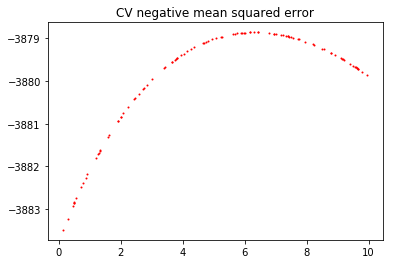

In [9]:
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], 'ro', markersize=1)
plt.title('CV negative mean squared error')
plt.show()